In [1]:
import sklearn.datasets as datasets
import pandas as pd
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

original_df=pd.read_csv('../data/zoo-animal-classification/zoo.csv', index_col=False)
class_names_df = pd.read_csv('../data/zoo-animal-classification/class.csv', index_col=False)
class_only = class_names_df[['Class_Number', 'Class_Type']]
class_only = class_only.rename(columns={'Class_Number': 'class_type', "Class_Type": "class_name"})
df = pd.merge(original_df, class_only, on='class_type', how='outer')
y=df['class_name']

df_class = df.copy()

del df['class_name']
del df['class_type']

for col in df.columns:
    items = list(df[col].unique())
    items.sort()
    if items==[0,1]:
        df[col]=df[col].astype(bool)

In [2]:


df_bool = df.copy()
df_bool

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
3,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
4,buffalo,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
5,calf,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,1
6,cavy,1,0,0,1,0,0,0,1,1,1,0,0,4,0,1,0
7,cheetah,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
8,deer,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
9,dolphin,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,1


In [3]:
X_train, X_test, y_train, y_test = train_test_split(df_bool, y, test_size=0.33, random_state=1)
X_test_with_animal_name = X_test.copy()
del X_train['animal_name']
del X_test['animal_name']
df_bool.shape
X_train.shape

(67, 16)

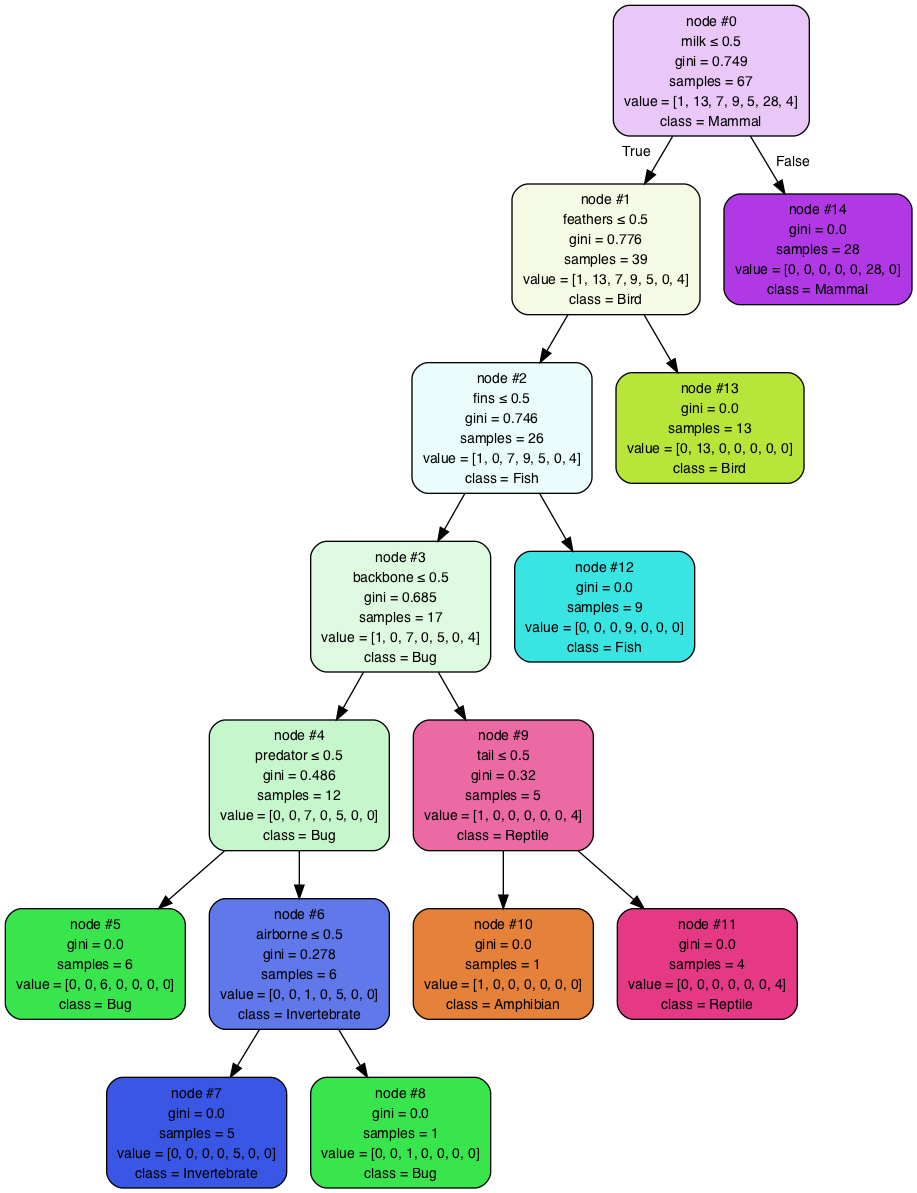

In [5]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
dot_data = StringIO()
class_names=list(class_only['class_name'].unique())
class_names.sort()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names = X_train.columns, node_ids=True, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [6]:
from sklearn.metrics import accuracy_score
y_pred = dtree.predict(X_test)
accuracy_score(y_test, y_pred)

0.9117647058823529

In [9]:
X_test_with_animal_name['y_pred']=y_pred
X_test_with_animal_name['y_test']=y_test
X_test_with_animal_name[X_test_with_animal_name['y_pred']!=X_test_with_animal_name['y_test']]

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,y_pred,y_test
94,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,Reptile,Amphibian
83,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Bug,Invertebrate
81,slug,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,Bug,Invertebrate


In [ ]:
dtree=DecisionTreeClassifier()
dtree.fit(df_bool,y)
dot_data = StringIO()
class_names=list(class_only['class_name'].unique())
class_names.sort()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, proportion=False, feature_names = df.columns, node_ids=False, class_names=class_names)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())


In [ ]:
class_names = list(class_only['class_name'])

In [ ]:
class_names.sort()
class_names

In [ ]:
del df_class['animal_name']

In [ ]:
class_names

In [ ]:
import matplotlib.pyplot as plt

def make_attribute_view(df_class, filename):
    gini_df = pd.DataFrame()
    oFig1 = plt.figure(1, figsize=(20,80))
       #(m,n,x) -> x starts with 1
    ...
    # iterating through every column in datafarme
    plot_index = 1
    
    for temp_class_name in df_class.columns:
        unique_col_values =list(df_class[temp_class_name].unique())
        unique_col_values.sort()

        if unique_col_values==[0,1]:
            # for a given column; plot distribution for every possible value

            gini_split=0
            num_at_record = df_class.shape[0]
            for i in range(0, len(unique_col_values)):
                unique_col_value = unique_col_values[i]
                temp_df = df_class[df_class[temp_class_name]==unique_col_value]
                values = []
                gini_score = 1.0
                num_at_child = float(temp_df.shape[0])
                for class_name in class_names:
                    count = temp_df[temp_df['class_name']==class_name].shape[0]
                    gini_score -= (float(count)/num_at_child)**2
                    values.append(count)
                    
                gini_split+=gini_score*(num_at_child/num_at_record)
                new = oFig1.add_subplot(20,2, plot_index)   
                new.bar(class_names, values)
                new.set_title(temp_class_name + " is " + str(unique_col_value) + " gini: " + f'{gini_score:.2f}' + " gini split: " + f'{gini_split:.2f}', fontsize=20)
                plot_index+=1
                temp_row = {'column_name': temp_class_name, 'column_value': unique_col_value, 'gini_score': gini_score, 'num_at_child': num_at_child, 'num_at_record': num_at_record, 'distribution': values }
                gini_df = gini_df.append(temp_row, ignore_index=True)
    plt.show()

    return gini_df
gini_df = make_attribute_view(df_class, 'milk')
gini_df

In [ ]:
gini_df

In [ ]:
num_at_record = df_class.shape[0]
gini_df['proportion'] =  gini_df['num_at_child'] * gini_df['gini_score'] 
gini_splits = gini_df.groupby('column_name')['proportion'].sum()/num_at_record
gini_split_df = gini_splits.reset_index().sort_values('proportion').rename(index=str, columns={'proportion': 'gini_split'})

In [ ]:
gini_split_df

In [ ]:
gini_split_df = gini_split_df[['column_name', 'gini_split']]
gini_split_df

In [ ]:
gini_split_df = gini_df.merge(gini_split_df, on='column_name').sort_values(['gini_split', 'column_value'])
gini_split_df

In [ ]:
def make_attribute_plots(gini_split_df, filename):

    oFig1 = plt.figure(1, figsize=(20,80))
#     filename = 'node0'

    plot_index = 1
    for index, row in gini_split_df.iterrows():
        print(row['column_name'], row['gini_split'])
        new = oFig1.add_subplot(20,2, plot_index)  
        temp_class_name = row['column_name']
        print(temp_class_name)
        unique_col_value = row['column_value']
        gini_score = row['gini_score']
        gini_split = row['gini_split']
        values = row['distribution']
        new.bar(class_names, values)
        new.set_title(temp_class_name + " is " + str(unique_col_value) + ", gini: " + f'{gini_score:.2f}' + ", gini split: " + f'{gini_split:.2f}', fontsize=20)
        plot_index+=1

    oFig1.savefig("../d3/static_tree/python_plots/" + filename, pad_inches=0.4, bbox_inches="tight")
    plt.show()
    
make_attribute_plots(gini_split_df, 'node0')


In [ ]:
gini_splits.index.values

In [ ]:
gini_splits.values

In [ ]:
df_milk_is_1 = df_class[df_class['milk']==1]
make_attribute_view(df_milk_is_1, 'node18')

df_milk_is_11 = df_class[df_class['milk']==0]
make_attribute_view(df_milk_is_11, 'node1')

In [ ]:
make_attribute_plots(gini_split_df, 'node0')

In [ ]:
hist_vals = df_class['class_name'].value_counts(sort=False)
plt.bar(hist_vals.index.values, hist_vals.values)

In [ ]:
export_graphviz(dtree, out_file='zoo.dot',  
                filled=True, rounded=True,
                special_characters=True, feature_names = df.columns, class_names=list(class_only['class_name'].unique()))

In [ ]:
dot_string= dot_data.getvalue()
x = dot_string.replace("&le;", "<=") #.replace("&#35;", "->")
x = x.replace("\n", "")
x = x.replace("<br/>", ",")
x = x.replace("label=<", "")
x = x.split(";")
x = x[2:-1]

In [ ]:
import re
edge_list =[]
node_list =[]
element_regex = re.compile(r'.+->.+')
for i in x:
    if element_regex.match(i):
        edge_list.append(i)
    else:
        node_list.append(i)

In [ ]:
edge_df = pd.DataFrame(columns=['current_node', 'parent_node'])
for i in range(0, len(edge_list)):
    print(edge_list[i])
    pattern = "(\d+)"
    a = re.findall(pattern, edge_list[i])
    source = a[0]
    destination = a[1]
    edge_df = edge_df.append({'current_node': destination, 'parent_node': source}, ignore_index=True)
edge_df

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure


In [ ]:
x=np.arange(10)
x.shape
np.ones(x.shape)*0.4

In [ ]:
import seaborn as sns; sns.set()
sns.palplot(sns.color_palette())
def get_node_string(orig):
    print(orig)
    
    # parse and retrieve value
    node_name = re.search('^\d+', orig).group(0)
    samples = re.search('samples = (\d+)', orig).group(1)
    gini = re.search('gini = (\d+.\d+)', orig).group(1)
    class_name = re.search('class = (\w+)', orig).group(1)
    color = re.search('fillcolor=(.+")', orig).group(1)
    value =  re.search( 'value = (.+]),', orig).group(1)
    new_value = value.replace('[', '').replace(']', '').split(",")
    
    
    #make figure:
    fig, (ax1, ax2) = plt.subplots(1,2, gridspec_kw = {'width_ratios':[1, 3]}, figsize=(4, 2))
    
    #gini plot
    ax1.set_title('gini')
    ax1.bar(0, float(gini), color='darkred')
    ax1.get_xaxis().set_visible(False)
    
    
    #class distribution plot
    ax2.set_title('class distribution')
    plot_class_names = list(class_only['class_name'])
    _X = np.arange(len(plot_class_names))
    print(new_value)
    new_new_value = [int(x) for x in new_value]
    ax2.bar(plot_class_names, new_new_value, color=sns.color_palette("Paired")[0:8])
    ax2.set_ylim(0, 45)

   
    
    plt.setp(ax2.xaxis.get_majorticklabels(), rotation=90)
    
    plot_name = 'plots/'+'gini' + str(node_name) + '.png'
    plt.show()
    
    temp_row = {'current_node': node_name, 'gini': gini, 'samples': samples, 'class_name': class_name, 'color': color, 'value': value, 'plot_name': plot_name}
    
    #check if gini is in the first result
    s = orig.split(',')
    pattern = 'gini'
    gini_match = re.search(pattern, s[0])
    
    if gini_match is None: 
        attribute = s[0].split("[")[1]
        temp_row['attribute']= attribute
   
        
    return (temp_row, fig)

In [ ]:
ult_df = pd.DataFrame(columns=['current_node', 'attribute', 'gini', 'samples', 'value', 'class_name', 'color', 'plot_name'])
# ult_df = df_.fillna(0) # with 0s rather than NaNs
ult_df

In [ ]:
node_list

In [ ]:
ult_list = {}
for i in range(0, len(node_list)):
    (node_string, fig) = get_node_string(node_list[i])
    ult_df = ult_df.append(node_string, ignore_index=True)
    fig.savefig('../treant-js/examples/decision-tree/' + node_string['plot_name'], pad_inches=0.4, bbox_inches="tight")

In [ ]:
ult_df

In [ ]:
new_df = ult_df.merge(edge_df, on='current_node', how='outer')
new_df
# new_df.fillna(0)

In [ ]:
make_attribute_view(df_class, 'node0')

In [ ]:
make_attribute_view(df_class[df_class['milk'] > 0.5], 'node18')

In [ ]:
make_attribute_view(df_class[df_class['milk'] <= 0.5], 'node1')

In [ ]:
full_string = ""
for index, row in new_df.iterrows():
    node_name = row['current_node']
    attribute = row['attribute']
    plot_name = row['plot_name']
    samples = row['samples']
    class_name = row['class_name']
    value = row['value']
    gini = row['gini']
    if node_name=='0':
        result = 'node'+ str(node_name) + ' = {'\
        + 'text: { gini: "gini:' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},'
    else:
        parent = row['parent_node']
        result = 'node'+ str(node_name) + ' = {' + "parent: node" + str(parent) \
        + ', text: {' \
        + 'gini: "gini: ' + gini \
        + '", samples: "samples: ' + samples \
        + '", attribute: "attribute: ' + str(attribute) \
        + '", class_name: "class_name: ' + class_name \
        + '", value: "value: ' + value \
        + '"},'\
        + 'connectors: {type: "curve", style: {"stroke-width": ' + str(int(samples)/5) + '}},' \
        + 'image:"' + plot_name + '"},' 
        
        
#     print(result)
    full_string+=result
    
    
#         + 'connectors: {type: "step", style: {"stroke-width": 2}},' \


In [ ]:
first_part = 'var config = {container: "#basic-example", levelSeparation: 200, connectors: {type: "curve", style: { "stroke-width": 5}}, node: { HTMLclass: "nodeExample1"}}, '
last_part = "chart_config = [config," + ','.join(['node' + str(x) for x in list(new_df['current_node'].keys())])+'];'
whole_string = first_part + full_string + last_part
text_file = open("../treant-js/examples/decision-tree/basic-example.js", "w")
text_file.write(whole_string)
text_file.close()

In [ ]:
whole_string